# Just a playground to test my ideas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True)
df.set_index('date', drop=False)

,date,value
date,,
2016-05-09,2016-05-09,1201
2016-05-10,2016-05-10,2329
2016-05-11,2016-05-11,1716
2016-05-12,2016-05-12,10539
2016-05-13,2016-05-13,6933
...,...,...
2019-11-29,2019-11-29,171584
2019-11-30,2019-11-30,141161
2019-12-01,2019-12-01,142918


In [4]:
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


Text(0, 0.5, 'Page Views')

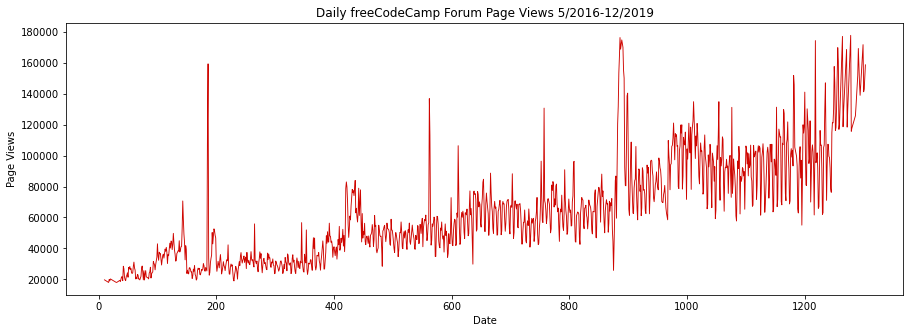

In [5]:
fig, axis = plt.subplots(1, 1)

fig.set_figwidth(15)
fig.set_figheight(5)

plt.plot(df.index, df["value"], c="#CF0500", lw=.9)  # Set color, line width and antialiasing
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

In [6]:
df["year"] = pd.DatetimeIndex(df["date"]).year
df["month"] = pd.DatetimeIndex(df["date"]).month
df

,date,value,year,month
10,2016-05-19,19736,2016,5
17,2016-05-26,18060,2016,5
18,2016-05-27,19997,2016,5
19,2016-05-28,19044,2016,5
20,2016-05-29,20325,2016,5
...,...,...,...,...
1294,2019-11-24,138875,2019,11
1299,2019-11-29,171584,2019,11
1300,2019-11-30,141161,2019,11
1301,2019-12-01,142918,2019,12


### Months need to be indexed starting from 1!

In [7]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [8]:
df["month"].min()

1

In [9]:
df["month"].max()

12

In [10]:
df_grouped = df.groupby(["year", "month"]).mean().copy().reset_index()
df_grouped.head(15)

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [11]:
pd.unique(df["year"])

array([2016, 2017, 2018, 2019])

In [12]:
df_grouped.head(2)

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263


Text(0, 0.5, 'Average Page Views')

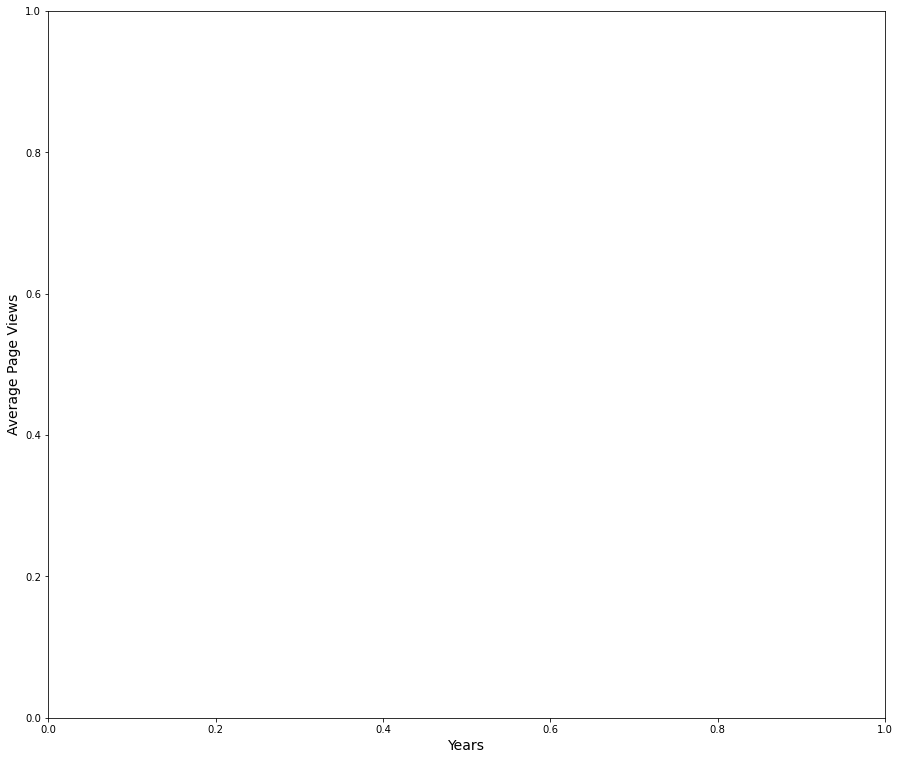

In [13]:
fig, axis = plt.subplots(figsize=(15,13))
axis.set_xlabel("Years", fontsize=14)
axis.set_ylabel("Average Page Views", fontsize=14)

In [14]:
#df_grouped["year" == 2017 & "month" == 5]
for i in range(1, 13):
    print(df_grouped[(df_grouped["month"] == i)]["value"])

8      32785.161290
20     58580.096774
32    102056.516129
Name: value, dtype: float64
9      31113.071429
21     65679.000000
33    105968.357143
Name: value, dtype: float64
10    29369.096774
22    62693.774194
34    91214.483871
Name: value, dtype: float64
11    30878.733333
23    62350.833333
35    89368.433333
Name: value, dtype: float64
0     19432.400000
12    34244.290323
24    56562.870968
36    91439.903226
Name: value, dtype: float64
1     21875.105263
13    43577.500000
25    70117.000000
37    90435.642857
Name: value, dtype: float64
2     24109.678571
14    65806.838710
26    63591.064516
38    97236.566667
Name: value, dtype: float64
3      31049.193548
15     47712.451613
27     62831.612903
39    102717.310345
Name: value, dtype: float64
4     41476.866667
16    47376.800000
28    65941.733333
40    97268.833333
Name: value, dtype: float64
5      27398.322581
17     47438.709677
29    111378.142857
41    122802.272727
Name: value, dtype: float64
6      40448.633333
18

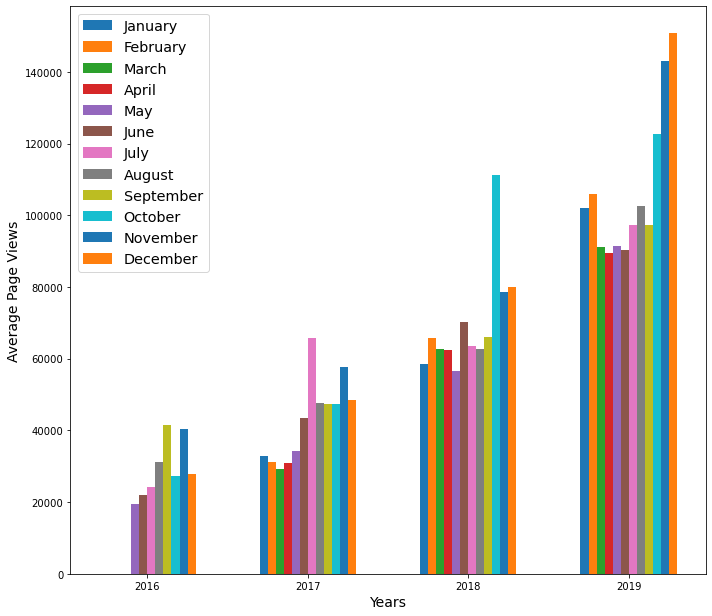

In [15]:
# Inspired by https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

group_labels = pd.unique(df["year"])

means1 = list(df_grouped[(df_grouped["month"] == 1)]["value"])
means1.insert(0,0)
means2 = list(df_grouped[(df_grouped["month"] == 2)]["value"])
means2.insert(0,0)
means3 = list(df_grouped[(df_grouped["month"] == 3)]["value"])
means3.insert(0,0)
means4 = list(df_grouped[(df_grouped["month"] == 4)]["value"])
means4.insert(0,0)
means5 = list(df_grouped[(df_grouped["month"] == 5)]["value"])
means6 = list(df_grouped[(df_grouped["month"] == 6)]["value"])
means7 = list(df_grouped[(df_grouped["month"] == 7)]["value"])
means8 = list(df_grouped[(df_grouped["month"] == 8)]["value"])
means9 = list(df_grouped[(df_grouped["month"] == 9)]["value"])
means10 = list(df_grouped[(df_grouped["month"] == 10)]["value"])
means11 = list(df_grouped[(df_grouped["month"] == 11)]["value"])
means12 = list(df_grouped[(df_grouped["month"] == 12)]["value"])

#x = np.arange(len(labels))  # the label locations
x = np.arange(len(group_labels))  # the year label locations
width = 0.05  # the width of the bars

fig, axis = plt.subplots(figsize=(10,13*(2/3)))
rects = list()
for i in range(1,13):
    rects.append(i)
    #print(rects)
    
rects1 = axis.bar(x - (11/2)*width, means1, width, label=months[0])
rects2 = axis.bar(x - (9/2)*width, means2, width, label=months[1])
rects3 = axis.bar(x - (7/2)*width, means3, width, label=months[2])
rects4 = axis.bar(x - (5/2)*width, means4, width, label=months[3])
rects5 = axis.bar(x - (3/2)*width, means5, width, label=months[4])
rects6 = axis.bar(x - (1/2)*width, means6, width, label=months[5])
rects7 = axis.bar(x + (1/2)*width, means7, width, label=months[6])
rects8 = axis.bar(x + (3/2)*width, means8, width, label=months[7])
rects9 = axis.bar(x + (5/2)*width, means9, width, label=months[8])
rects10 = axis.bar(x + (7/2)*width, means10, width, label=months[9])
rects11 = axis.bar(x + (9/2)*width, means11, width, label=months[10])
rects12 = axis.bar(x + (11/2)*width, means12, width, label=months[11])

# Add some text for labels, title and custom x-axis tick labels, etc.
axis.set_xlabel("Years", fontsize=14)
axis.set_ylabel("Average Page Views", fontsize=14)
axis.set_xticks(x)
axis.set_xticklabels(group_labels)
axis.legend(fontsize="x-large")

fig.tight_layout()

plt.show()

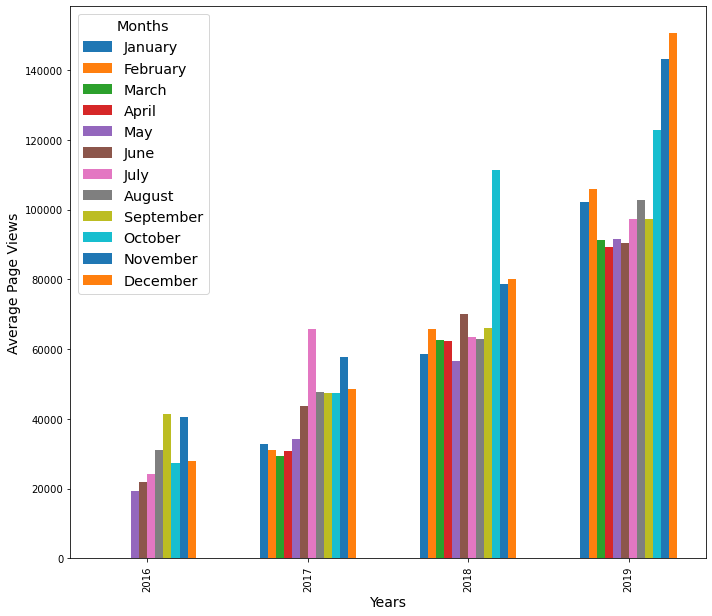

In [16]:
# Inspired by https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

group_labels = pd.unique(df["year"])

means = list()

for i in range(1, 13):
    means.append(list(df_grouped[(df_grouped["month"] == i)]["value"]))
    if len(means[i - 1]) < 4:
        means[i - 1].insert(0,0)

x = np.arange(len(group_labels))  # the year label locations
width = 0.05  # the width of the bars

fig, axis = plt.subplots(figsize=(10,13*(2/3)))

rects = list()
size_differential = -11

for i in range(0,12):
    rects.append(axis.bar(x + ((size_differential + (2*i)) / 2) * width, means[i], width, label=months[i]))

# Add some text for labels, title and custom x-axis tick labels, etc.
axis.set_xlabel("Years", fontsize=14)
axis.set_ylabel("Average Page Views", fontsize=14)
axis.set_xticks(x)
axis.set_xticklabels(group_labels, rotation=90, ha="center")
axis.legend(title="Months", title_fontsize="x-large", fontsize="x-large")

fig.tight_layout()

plt.show()

### Let's try the third graph

In [42]:
df_box = df.copy()

df_box["year"] = pd.DatetimeIndex(df_box["date"]).year
df_box["month"] = pd.DatetimeIndex(df_box["date"]).month
short_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box["month_text"] = df_box["month"].map(lambda month: short_months[month - 1])
df_box

,date,value,year,month,month_text
10,2016-05-19,19736,2016,5,May
17,2016-05-26,18060,2016,5,May
18,2016-05-27,19997,2016,5,May
19,2016-05-28,19044,2016,5,May
20,2016-05-29,20325,2016,5,May
...,...,...,...,...,...
1294,2019-11-24,138875,2019,11,Nov
1299,2019-11-29,171584,2019,11,Nov
1300,2019-11-30,141161,2019,11,Nov
1301,2019-12-01,142918,2019,12,Dec


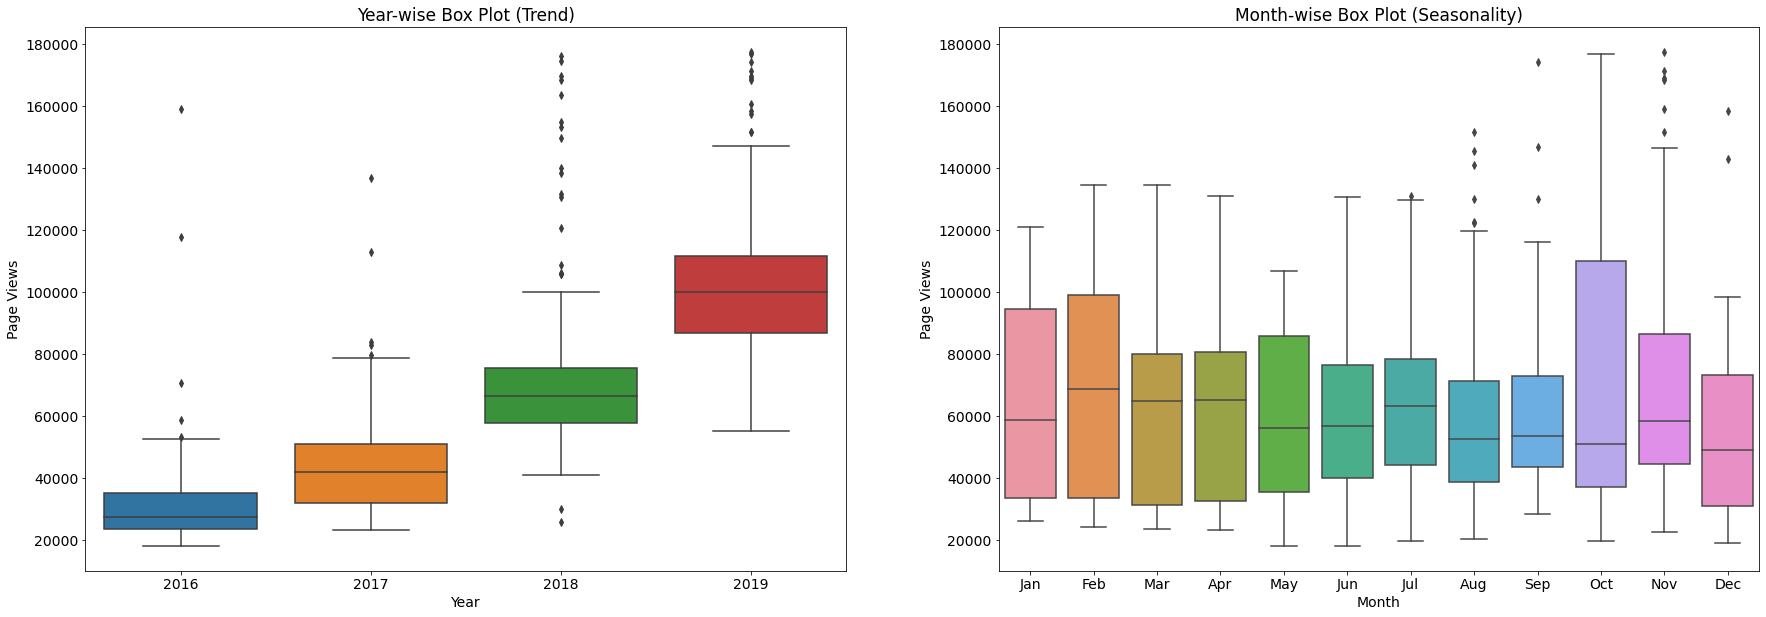

In [78]:
df_box = df_box.sort_values(by="month")

fig, axis = plt.subplots(1, 2, figsize=(30, 10))
yearwise = axis[0]
monthwise = axis[1]

yearwise = sns.boxplot(x=df_box.year, y=df_box.value, ax=yearwise)
yearwise.set_title("Year-wise Box Plot (Trend)", fontsize="17")
yearwise.set_xlabel("Year", fontsize="14")
yearwise.set_ylabel("Page Views", fontsize="14")
yearwise.tick_params(labelsize="14")

monthwise = sns.boxplot(x="month_text", y="value", data=df_box, ax=monthwise)
monthwise.set_title("Month-wise Box Plot (Seasonality)", fontsize="17")
monthwise.set_xlabel("Month", fontsize="14")
monthwise.set_ylabel("Page Views", fontsize="14")
monthwise.tick_params(labelsize="14")